In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

### Load data and split into training data and validation data

In [ ]:
feature = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_feature.csv')
label = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_label.csv')
X_train, X_val, y_train, y_val = train_test_split(feature.values, label.values, test_size=0.1, random_state=3)

### Build Model

1) Define a model of three dense layers with ReLu activation functions. The output of the two first layers should have 300 neurons. 

2) Train the model for 2000 epochs with a batch size of 64 and a mean squared error loss.


In [ ]:
## To-do

### Load the testing dataset

In [ ]:
X_test = pd.read_csv('https://raw.githubusercontent.com/BolunDai0216/nyuMLSummerSchool/master/day05/fish_market_test_feature.csv').values
y_test = pd.read_csv('https://raw.githubusercontent.com/BolunDai0216/nyuMLSummerSchool/master/day05/fish_market_test_label.csv').values


# Predict the corresponding y_hat value of the test dataset
## To-do

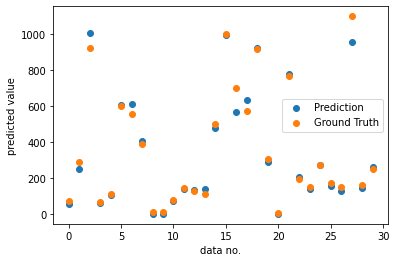

In [ ]:
plt.figure()
plt.scatter(np.arange(y_hat.shape[0]), y_hat, label='Prediction')
plt.scatter(np.arange(y_test.shape[0]), y_test, label='Ground Truth')
plt.legend()
plt.xlabel('data no.')
plt.ylabel('predicted value')
plt.show()